# Халайджи Александр Константинович

### Задача 2.2

Разработать скрипт, который будет с адекватным качеством классифицировать тексты по стилю (“разговорный”, “техническая литература”, “художественная литература”). 
(качество может быть ограничено лимитированным временем).
Обучающий датасет не предоставляется. 

Ссылка на колаб - https://colab.research.google.com/drive/1wC4MEiz0zC8GkHikQ5D1x7Kk4E9sDsBQ?usp=sharing

Итак, надо написать модель, которая определяет стиль написания текста, то есть определяет текст к одному из трёх стилей:


1.   Разговорный стиль
2.   Художественный стиль
3.   Технический стиль

Для того, чтобы решить эту задачу, надо для начала найти датасет с данными. Поскольку я не смог найти прямого датасета под эту задачу в интернете, буду собирать этот датасет частями. То есть надо найти какие-то данные под каждый из пунктов и соединить их вместе



Саму задачу буду решать **на русском языке** - по-хорошему это надо обсуждать с заказчиками, но в этой задаче сделаем вид, что это обсудили - заказчики русскоговорящие, планируют выпустить какое-то приложение в России и им необходимо написать определение стиля написания для русских текстов

### Разговорная речь

Какие датасеты вообще приходят в голову, когда речь заходит о разговорном стиле. Ну во-первых, можно взять датасет каких-нибудь диалогов людей и вытащить оттуда отдельные реплики. Можно взять какие-то обычные сообщения пользователей в мессенджерах. Можно взять те же твиты людей. Все эти варианты являются достаточно неплохими. Можно взять все это вместе и объединить - получить большой такой датасет. 

### Художественный стиль

Ну тут всё ясно и достаточно однозначно - самый лучший источник текстов в художественном стиле - это произведения художественной литературы. Например, какая-нибудь классика типа Толстого, Чехова, Пушкина. Благо тут можно вытащить достаточно много данных

### Технический стиль

Ну и тут в целом всё достаточно понятно. В техническом стиле пишут статьи и разные учебники. Достаточно рассмотреть статьи по разным тематикам и предметным областям, взять учебники по разным дисциплинам и достать тексты оттуда

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re

Таким образом мы нашли способ искать тексты различных стилей. **Давайте напишем генерацию данных**. Далее этими данными мы будем пользоваться в задаче

Попробуем начать с *разговорного стиля*. 

Для начала посмотрим на датасет из интернета, в котором собраны диалоги из художественных произведений. Есть некоторые сомнения по поводу этого датасета - но возможно, не всё так плохо

In [2]:
!wget https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/Conversations/Data/ru.conversations.txt

--2022-01-18 15:41:08--  https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/Conversations/Data/ru.conversations.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9718314 (9.3M) [text/plain]
Saving to: ‘ru.conversations.txt’

ru.conversations.tx 100%[===================>]   9.27M  --.-KB/s    in 0.09s   

2022-01-18 15:41:09 (99.1 MB/s) - ‘ru.conversations.txt’ saved [9718314/9718314]



In [3]:
conversations = []
for l in open("ru.conversations.txt"):
  conversations.append(l)
print(conversations[:10])

['- Что,  Мансур,  не жарко теперь тебе?\n', '- Спрашиваю, не жарко ему теперь?\n', '\n', '- Какой полк?\n', '- Тысяча тридцать четвертый.\n', '- Вези дальше. Тут тысяча двадцать шестой.\n', '\n', '- Какая санрота?\n', '- Тысяча тридцать шестая.\n', '- Значит, наша! Принимай тяжелораненого!\n']


In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def process_text(text):
  return text.translate(str.maketrans('', '', string.punctuation)).strip().lower()

In [6]:
# Удаляем всю пунктуацию из текста и замечаем, что в тексте некоторые блоки разговорной речи разделены '\n' - от этого надо избавиться
conversations = [process_text(conversation) for conversation in conversations if conversation != '\n']
conversations[:10]


['что  мансур  не жарко теперь тебе',
 'спрашиваю не жарко ему теперь',
 'какой полк',
 'тысяча тридцать четвертый',
 'вези дальше тут тысяча двадцать шестой',
 'какая санрота',
 'тысяча тридцать шестая',
 'значит наша принимай тяжелораненого',
 'сколько фрицев в котле',
 'тысяч сорок']

Конечно, сложно сказать, что это прям разговорный стиль - но лично я буду считать такой текст именно разговорным. Всё-таки, наверное, этот корпус текстов не очень хорошо подходит для данной задачи - можно объяснить тем, что всё-таки в литературе диалоги пишутся скорее в художественном стиле. Но при этом диалог сложно отнести именно к художественному стилю. Поэтому чтобы улучшить обучение модели я, пожалуй, вообще **не буду брать этот датасет** - не думаю, что это разговорный стиль просто

Далее можно найти подготовленный корпус русскоязычных твитов с положительной или отрицательной окраской отзыва. Он расположен по ссылке http://study.mokoron.com - мне не удалось найти чего-то лучше в русскоязычном сегменте. Скачиваем датасеты с сайта в формате csv и работаем тут с ними

In [7]:
!wget https://www.dropbox.com/s/6xnz4f0xmgk8b3v/negative.csv?dl=0
!wget https://www.dropbox.com/s/k3wpj7krpzytoky/positive.csv?dl=0

--2022-01-18 15:41:15--  https://www.dropbox.com/s/6xnz4f0xmgk8b3v/negative.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6xnz4f0xmgk8b3v/negative.csv [following]
--2022-01-18 15:41:16--  https://www.dropbox.com/s/raw/6xnz4f0xmgk8b3v/negative.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde2cfcfd5e8d86bcf2170e943b.dl.dropboxusercontent.com/cd/0/inline/BeAZfwUkub7-iaVrsoZxc2Fh3agJZWTU0ahU6j3RfRo2US2Zy9NuYXqrDpk9YDa44g0AEbX8z32-RLdCXO5fdFV2Vwb4gwNUy6wPOupMZpA00bWu7RH-C2OxwgXtOFkm4R4PRXrMUHQvPSU8Gg3_gF4a/file# [following]
--2022-01-18 15:41:16--  https://ucde2cfcfd5e8d86bcf2170e943b.dl.dropboxusercontent.com/cd/0/inline/BeAZfwUkub7-iaVrsoZxc2Fh3agJZWTU0ahU6j3RfRo2US2Zy9NuYXqrDpk9YDa44g0AEbX8z32-RLdCXO

In [8]:
positive_tweets = pd.read_csv('positive.csv?dl=0', sep=';').iloc[:, 3]
negative_tweets = pd.read_csv('negative.csv?dl=0', sep=';').iloc[:, 3]

tweets = positive_tweets.append(negative_tweets).dropna()
print(len(tweets))
print(len(positive_tweets), len(negative_tweets))
tweets[:10]

226832
114910 111922


0    Да, все-таки он немного похож на него. Но мой ...
1    RT @KatiaCheh: Ну ты идиотка) я испугалась за ...
2    RT @digger2912: "Кто то в углу сидит и погибае...
3    @irina_dyshkant Вот что значит страшилка :D\nН...
4    ну любишь или нет? — Я не знаю кто ты бля:D ht...
5    RT @SpoonLamer: Ох,900 :D ну это конечно же @t...
6    RT @veregijytaqo: У тебя есть ухажёр? Нет - мо...
7    Поприветствуем моего нового читателя @Alexey17...
8    Теперь у меня есть частичка Сиднея :) #Sydney ...
9    Люблю маму и папу!!!!а в остальное я так...-вл...
dtype: object

Вот этот датасет действительно уже гораздо больше напоминает разговорную речь. Наверное, на нём и остановимся. Только эти тексты необходимо нормализовать перед использованием. Заметим, что в этом тексте, например, часто встречается комбинация @<nickname> - конечно, достаточно хорошая подсказка для модели, что это будет разговорная речь, но кажется, что все эти пинги в сообщениях можно просто удалить, поскольку иначе модель может переобучиться на наличие таких символов, а они есть практически в каждом предложении. Кроме того, в начале некоторых предложений встречается комбинация "RT :" - это ретвиты. Такие штуки тоже можно удалить . Так же можно удалить разные вещи по типу ":D", "\&lt;3" (это сердечко) и прочие такие. Кроме этого попробуем удалить ссылки, которые любят вставлять - обычно они с протоколом http (или https)

In [9]:
def process_tweet(tweet):
  result = re.sub("@\w+", '', tweet)
  result = re.sub('RT\s*:', '', result)
  result = re.sub('&lt;3', '', result)
  result = re.sub(':D+', '', result)
  result = re.sub("—", '', result)
  result = re.sub("–", '', result)
  result = re.sub("“", '', result)
  result = re.sub("…", '', result)
  result = re.sub('&gt;', '', result)
  result = result.translate(str.maketrans('', '', string.punctuation)).lower()
  result = " ".join([t for t in result.split() if not t.startswith('http')])
  return re.sub("\s+", " ", result.strip())

In [10]:
# s = "RT @SpoonLamer: Ох,900 :D ну это конечно же @twinkleAYO . Чтобы у нее было много друзей, ведь она такая мимими &lt;3"
s = 'RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD http://t.co/GqG6iuE2…'
print(s)
print(process_tweet(s))
print(s)

RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD http://t.co/GqG6iuE2…
кто то в углу сидит и погибает от голода а мы ещё 2 порции взяли хотя уже и так жрать не хотим
RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD http://t.co/GqG6iuE2…


In [11]:
tweets = tweets.apply(process_tweet).drop_duplicates()
tweets

0         да всетаки он немного похож на него но мой мал...
1                        ну ты идиотка я испугалась за тебя
2         кто то в углу сидит и погибает от голода а мы ...
3         вот что значит страшилка но блинпосмотрев все ...
4                    ну любишь или нет я не знаю кто ты бля
                                ...                        
111917                 но не каждый хочет что то исправлять
111918    скучаю так только вправляет мозги но я все рав...
111919              вот и в школу в говно это идти уже надо
111920                             тауриэль не грусти обнял
111921    такси везет меня на работу раздумываю приплати...
Length: 211351, dtype: object

Посмотрим теперь на то, какая вообще длина у текста бывает внутри датасета. Нам это понадобится в дальнейшем, когда в других датасетах мы будем выделять тексты

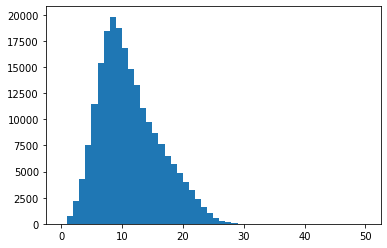

In [12]:
plt.hist(list(map(lambda x: len(x.split()), tweets.values)), bins=np.arange(0, 51))
plt.show()

Видим, что нам надо выделять тексты длин не больше 40 слов. Так в дальнейшем и постараемся делать

## Художественный стиль

Тут я решил зайти на сайт lib.ru и посмотреть в раздел "Русская классика". Взял произведение А.С.Пушкина "Дубровский" - http://lib.ru/LITRA/PUSHKIN/dubrowskij.txt ну и что-нибудь немного иного стиля писания - например, зарубежного Рэй Брэдбери "Надвигается беда" http://lib.ru/INOFANT/BRADBURY/beda.txt

Весь текст сохраняем внутри textedit, сохраняем в txt формате, убирая лишнии ссылки и прочую ненужную информацию сверху и снизу на странице, а дальше закидываем на dropbox

https://www.dropbox.com/s/da4kl939ug2neay/Bredberry.txt?dl=0 - Брэдбери

https://www.dropbox.com/s/50jyal1afdhtfm5/Dubrovskiy.txt?dl=0 - Дубровский

Таким образом под **художественным стилем я понимаю текст, который написан в художественных произведениях**

In [13]:
!wget https://www.dropbox.com/s/da4kl939ug2neay/Bredberry.txt?dl=0 

--2022-01-18 15:41:33--  https://www.dropbox.com/s/da4kl939ug2neay/Bredberry.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/da4kl939ug2neay/Bredberry.txt [following]
--2022-01-18 15:41:33--  https://www.dropbox.com/s/raw/da4kl939ug2neay/Bredberry.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdbe8358c3d8cba90f27132d019.dl.dropboxusercontent.com/cd/0/inline/BeAwDcitoGc0AWRPPTDrUUiMusJd-ceKvNSPv1U-XgD-jiuK1MBVaP25a-SR58Ct0VUlvcy0i468XV5prARzEASXYbXm_oXGzMm5lR15-JXXCMeTaDGKQH1vSu9Sg21-SJAZ9NftQEeJPaJF0XvnpD97/file# [following]
--2022-01-18 15:41:34--  https://ucdbe8358c3d8cba90f27132d019.dl.dropboxusercontent.com/cd/0/inline/BeAwDcitoGc0AWRPPTDrUUiMusJd-ceKvNSPv1U-XgD-jiuK1MBVaP25a-SR58Ct0VUlvcy0i468XV5

In [14]:
!wget https://www.dropbox.com/s/50jyal1afdhtfm5/Dubrovskiy.txt?dl=0

--2022-01-18 15:41:35--  https://www.dropbox.com/s/50jyal1afdhtfm5/Dubrovskiy.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/50jyal1afdhtfm5/Dubrovskiy.txt [following]
--2022-01-18 15:41:36--  https://www.dropbox.com/s/raw/50jyal1afdhtfm5/Dubrovskiy.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce45f13d44d4894b45531ff64d7.dl.dropboxusercontent.com/cd/0/inline/BeDthYvnBsjPNvrthKkgDgxhiPJ1HiWODIpm-GKQaaSlhxO5DbQ5Uycr5na4ZkPHyfVkJ0aua5Rr6sLKHpgXO8UAo5uxmc960BAe4554Rr21-Vioy5xtDc9s2oPQQA5VvOvVwDs1g4NEaPiUgQeUAoYf/file# [following]
--2022-01-18 15:41:36--  https://uce45f13d44d4894b45531ff64d7.dl.dropboxusercontent.com/cd/0/inline/BeDthYvnBsjPNvrthKkgDgxhiPJ1HiWODIpm-GKQaaSlhxO5DbQ5Uycr5na4ZkPHyfVkJ0aua5Rr

In [15]:
bredbery = []
for l in open("Bredberry.txt?dl=0"):
  bredbery.append(l)
bredbery[:10]

['     ПРОЛОГ\n',
 '     Главное  дело  -  стоял октябрь,  месяц, особенный для  мальчишек. Само\n',
 'собой,  остальные месяцы тоже  не похожи друг на друга, просто, как  говорят\n',
 'пираты, одни получше, другие похуже. Взять вот сентябрь - плохой месяц: надо\n',
 'в школу идти. Август не в пример лучше - до школы еще не близко.\n',
 '     Июль - ну, июль замечательный: куда ни глянь, на школу и намека нет. Ну\n',
 'а уж июнь лучше  всех: школьные  двери  нараспашку, а  до сентября - миллион\n',
 'лет.\n',
 '     А  теперь  взять  октябрь. Уже месяц, как началась школьная тягомотина,\n',
 'значит, к узде пообвык, и дальше пойдет легче.\n']

In [16]:
dubrovskiy = []
for l in open("Dubrovskiy.txt?dl=0"):
  dubrovskiy.append(l)
dubrovskiy[:10]


['\n',
 '\t•\t * ТОМ ПЕРВЫЙ * \n',
 '\n',
 '\n',
 '\t•\tГЛАВА 1.\n',
 '\n',
 '     Несколько  лет  тому  назад  в  одном  из своих  поместий жил старинный\n',
 'русской барин, Кирила Петрович Троекуров. Его богатство, знатный род и связи\n',
 'давали ему большой вес в губерниях, где  находилось его имение.  Соседи рады\n',
 'были угождать малейшим его прихотям; губернские чиновники трепетали  при его\n']

Теперь эти тексты надо немного преобразовать, чтобы с ними можно было нормально работать. Для начала избавимся от обозначений глав, томов и прочего такого - обычно это слова, которые полностью состоят из больших букв

In [17]:
bredbery = [elem for elem in bredbery if elem.upper() != elem]
bredbery[:5]

['     Главное  дело  -  стоял октябрь,  месяц, особенный для  мальчишек. Само\n',
 'собой,  остальные месяцы тоже  не похожи друг на друга, просто, как  говорят\n',
 'пираты, одни получше, другие похуже. Взять вот сентябрь - плохой месяц: надо\n',
 'в школу идти. Август не в пример лучше - до школы еще не близко.\n',
 '     Июль - ну, июль замечательный: куда ни глянь, на школу и намека нет. Ну\n']

In [18]:
dubrovskiy = [elem for elem in dubrovskiy if elem != elem.upper()]
dubrovskiy[:5]

['     Несколько  лет  тому  назад  в  одном  из своих  поместий жил старинный\n',
 'русской барин, Кирила Петрович Троекуров. Его богатство, знатный род и связи\n',
 'давали ему большой вес в губерниях, где  находилось его имение.  Соседи рады\n',
 'были угождать малейшим его прихотям; губернские чиновники трепетали  при его\n',
 'имени;  Кирила  Петрович принимал знаки  подобострастия как надлежащую дань;\n']

In [19]:
bredbery_text = " ".join([elem.strip() for elem in bredbery])
bredbery_text[:200]

'Главное  дело  -  стоял октябрь,  месяц, особенный для  мальчишек. Само собой,  остальные месяцы тоже  не похожи друг на друга, просто, как  говорят пираты, одни получше, другие похуже. Взять вот сент'

In [20]:
dubrovskiy_text = " ".join([elem.strip() for elem in dubrovskiy])
dubrovskiy_text[:200]

'Несколько  лет  тому  назад  в  одном  из своих  поместий жил старинный русской барин, Кирила Петрович Троекуров. Его богатство, знатный род и связи давали ему большой вес в губерниях, где  находилось'

Как человек определяет, является ли текст художественным. В целом, для этого ему не обязательно, чтобы текст начинался с начала какого-то предложения - мы умеем читать текст с середины предложения и оценивать, является ли это художественным произведением, или нет. 

Таким образом, нас в целом устраивает какие-то последовательности слов внутри текста. При этом сами слова уже обрезать нельзя, поскольку в таком случае мы передадим на вход какой-то текст, который потенциально будет содержать два новых, на самом деле несуществующих слова - в начале и в конце предложения

Подпоследовательности будем выбирать согласованно с диаграммой, которая была изображена в датасете с твитами. А именно - мы будем генерировать последовательности слов длины не больше 40. При этом, чтобы не было совсем коротких тексов, по которым действительно сложно что-то понять, мы будем выделять тексты длины хотя бы от 5 слов. Ну а чтобы внести некоторую случайность в построение, чтобы сделать модель устойчивее, мы будем генерировать последовательности случайных длин (получается, от 5 до 40)

Но изначально необходимо преобразовать текст. При этом преобразовывать мы его будем той же функцией, что и преобразовывали твиты. Делается это потому что мы при использовании модели не будем знать, какой объект нам приходит, и его надо обрабатывать таким же образом, что и другие. Поэтому в скрипте, который будет угадывать тематику, мы тоже будем использовать функцию `process_tweet`

In [21]:
bredbery_text = process_tweet(bredbery_text)
bredbery_text[:200]

'главное дело стоял октябрь месяц особенный для мальчишек само собой остальные месяцы тоже не похожи друг на друга просто как говорят пираты одни получше другие похуже взять вот сентябрь плохой месяц н'

In [22]:
dubrovskiy_text = process_tweet(dubrovskiy_text)
dubrovskiy_text[:200]

'несколько лет тому назад в одном из своих поместий жил старинный русской барин кирила петрович троекуров его богатство знатный род и связи давали ему большой вес в губерниях где находилось его имение '

In [23]:
bredbery_text = bredbery_text.split()
print(len(bredbery_text))
dubrovskiy_text = dubrovskiy_text.split()
print(len(dubrovskiy_text))

55108
20554


In [24]:
cur_word = 0
fiction = []
while cur_word < len(bredbery_text):
  saved_cur_word = cur_word
  max_length = int(np.random.uniform(5, 40))
  cur_text = " ".join(bredbery_text[cur_word:min(len(bredbery_text), cur_word + max_length)])
  if len(cur_text.split()) > 5:
    fiction.append(cur_text)
  cur_word = saved_cur_word + int(np.random.uniform(3, 7))
cur_word = 0
while cur_word < len(dubrovskiy_text):
  saved_cur_word = cur_word
  max_length = int(np.random.uniform(5, 40))
  cur_text = " ".join(dubrovskiy_text[cur_word:min(len(dubrovskiy_text), cur_word + max_length)])
  if len(cur_text.split()) > 5:
    fiction.append(cur_text)
  cur_word = saved_cur_word + int(np.random.uniform(3, 7))

print(len(fiction))
fiction[:10]

16310


['главное дело стоял октябрь месяц особенный для мальчишек само собой остальные месяцы тоже не',
 'месяц особенный для мальчишек само собой остальные месяцы тоже не похожи друг на друга просто как говорят пираты одни получше',
 'остальные месяцы тоже не похожи друг на друга просто как говорят пираты одни получше другие похуже взять вот сентябрь плохой месяц надо в школу идти август не в пример',
 'не похожи друг на друга просто как говорят пираты одни получше другие похуже взять вот',
 'на друга просто как говорят пираты одни получше другие похуже взять вот сентябрь плохой месяц надо в школу идти август не в пример лучше до школы еще не',
 'пираты одни получше другие похуже взять вот сентябрь плохой месяц надо в школу идти август не в пример лучше до школы еще не близко июль ну',
 'взять вот сентябрь плохой месяц надо в школу идти август не в пример лучше до школы еще не близко июль ну июль замечательный куда ни глянь на школу и намека нет ну а уж июнь лучше всех',
 'в школу идти авгус

Итак, мы рассмотрели два датасета. Теперь осталось добавить к ним последний датасет - датасет технической литературы 

## Технический стиль

В целом, тут можно использовать совершенно разные источники. Можно брать инструкции по эксплуатации, различные патенты

Я нашел в интернете хороший датасет - датасет статей из NIPS. https://www.kaggle.com/benhamner/nips-papers?select=papers.csv. Он достаточно хороший, там достаточно много разнообразных статей. Можно брать различные другие датасеты - например, текст дипломных работ или диссертаций, поскольку обычно они пишутся в соответствии с различными правилами ГОСТов в техническом стиле

Я же возьму выполненную в 2021 году (и защищенную!) моим братом кандидатскую диссертацию в качестве данных по технической литературе. Удалю по максимуму всякие вещи, которые не текстовые (формулы и прочее) и после этого запихну на дропбокс. После чего почищу их соответствующим образом, как и предыдущие данные - и наконец получу все части датасета. **Таким образом, под техническим стилем я буду понимать текст, который написан по технической тематике в соответствиями с требованиями ГОСТа, а именно - тексты дипломных, курсовых работ**

In [25]:
!wget https://www.dropbox.com/s/3fuqdwyx5ie8z06/%D0%94%D0%B8%D1%81%D1%81%D0%B5%D1%80%D1%82%D0%B0%D1%86%D0%B8%D1%8F.txt?dl=0

--2022-01-18 15:41:42--  https://www.dropbox.com/s/3fuqdwyx5ie8z06/%D0%94%D0%B8%D1%81%D1%81%D0%B5%D1%80%D1%82%D0%B0%D1%86%D0%B8%D1%8F.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3fuqdwyx5ie8z06/%D0%94%D0%B8%D1%81%D1%81%D0%B5%D1%80%D1%82%D0%B0%D1%86%D0%B8%D1%8F.txt [following]
--2022-01-18 15:41:42--  https://www.dropbox.com/s/raw/3fuqdwyx5ie8z06/%D0%94%D0%B8%D1%81%D1%81%D0%B5%D1%80%D1%82%D0%B0%D1%86%D0%B8%D1%8F.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f609c7487bb2c5739cbfce1c4.dl.dropboxusercontent.com/cd/0/inline/BeDcYxGy4gax4jc29UghTDvjOyquUZK79iX6zPORzzCas4VzMDEo-4OaukcZXbolw1nllrpyu8rO-qjBogSleo_RA0BTxbyBvzZGdj_6zeYcyiaLMeyNhABI6EoCv9HtLmxpYLWhenSwQorku_L0vkyW/file# [following]
--2022-0

In [26]:
dissertation = []
for l in open("Диссертация.txt?dl=0"):
  dissertation.append(l)
dissertation = dissertation[3:]
dissertation[:10]

['ГЛАВА 1. Анализ существующих подходов к автоматическому обнаружению аритмий по сигналу ЭКГ\t22\n',
 '1.1 Этапы автоматического анализа сигнала ЭКГ\t22\n',
 '1.2 Методы первичной обработки сигнала ЭКГ\t25\n',
 '1.3 Существующие подходы к признаковому описанию сигнала ЭКГ\t33\n',
 '1.4 Анализ подходов к автоматическому распознаванию аритмий\t42\n',
 '1.4.1 Исходные данные для распознавания аритмий по сигналу ЭКГ\t42\n',
 '1.4.2 Методы автоматического распознавания аритмий\t48\n',
 '1.5 Направления развития моделей, методов и признаковых описаний сигнала ЭКГ для автоматического распознавания аритмий\t68\n',
 '1.5.1 Общая характеристика состояния предметной области  автоматического распознавания аритмий\t68\n',
 '1.5.2 Проблемы существующих подходов к автоматическому  распознаванию аритмий\t72\n']

In [27]:
dissertation_text = " ".join([elem.strip() for elem in dissertation])
dissertation_text = process_tweet(dissertation_text)
dissertation_text[:200]

'глава 1 анализ существующих подходов к автоматическому обнаружению аритмий по сигналу экг 22 11 этапы автоматического анализа сигнала экг 22 12 методы первичной обработки сигнала экг 25 13 существующи'

In [28]:
dissertation_text = dissertation_text.split()
len(dissertation_text)

63368

In [29]:
cur_word = 0
tech_litra = []
while cur_word < len(dissertation_text):
  saved_cur_word = cur_word
  max_length = int(np.random.uniform(5, 40))
  cur_text = " ".join(dissertation_text[cur_word:min(len(dissertation_text), cur_word + max_length)])
  if len(cur_text.split()) > 5:
    tech_litra.append(cur_text)
  cur_word = saved_cur_word + int(np.random.uniform(3, 7))
print(len(tech_litra))
tech_litra[:10]

13698


['глава 1 анализ существующих подходов к автоматическому обнаружению аритмий по сигналу экг 22 11 этапы автоматического анализа сигнала экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14',
 'подходов к автоматическому обнаружению аритмий по сигналу экг 22 11 этапы автоматического анализа сигнала экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14 анализ подходов',
 'обнаружению аритмий по сигналу экг 22 11 этапы автоматического анализа сигнала экг 22 12 методы первичной',
 '11 этапы автоматического анализа сигнала экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14 анализ подходов к автоматическому',
 'экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14 анализ подходов',
 'обработки сигнала экг 25 13 существующие подходы к пр

## Объединение датасетов и подготовка данных для обучения и классификации

Теперь у нас имеются датасеты по всем трём тематикам. При генерации датасетов для оценки качества и обучения модели мы будем пользоваться ими всеми

In [30]:
print(len(tech_litra))
tech_litra[:5]

13698


['глава 1 анализ существующих подходов к автоматическому обнаружению аритмий по сигналу экг 22 11 этапы автоматического анализа сигнала экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14',
 'подходов к автоматическому обнаружению аритмий по сигналу экг 22 11 этапы автоматического анализа сигнала экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14 анализ подходов',
 'обнаружению аритмий по сигналу экг 22 11 этапы автоматического анализа сигнала экг 22 12 методы первичной',
 '11 этапы автоматического анализа сигнала экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14 анализ подходов к автоматическому',
 'экг 22 12 методы первичной обработки сигнала экг 25 13 существующие подходы к признаковому описанию сигнала экг 33 14 анализ подходов']

In [31]:
print(len(fiction))
fiction[:5]

16310


['главное дело стоял октябрь месяц особенный для мальчишек само собой остальные месяцы тоже не',
 'месяц особенный для мальчишек само собой остальные месяцы тоже не похожи друг на друга просто как говорят пираты одни получше',
 'остальные месяцы тоже не похожи друг на друга просто как говорят пираты одни получше другие похуже взять вот сентябрь плохой месяц надо в школу идти август не в пример',
 'не похожи друг на друга просто как говорят пираты одни получше другие похуже взять вот',
 'на друга просто как говорят пираты одни получше другие похуже взять вот сентябрь плохой месяц надо в школу идти август не в пример лучше до школы еще не']

In [32]:
tweets = tweets.values
print(len(tweets))
tweets[:5]

211351


array(['да всетаки он немного похож на него но мой мальчик все равно лучше',
       'ну ты идиотка я испугалась за тебя',
       'кто то в углу сидит и погибает от голода а мы ещё 2 порции взяли хотя уже и так жрать не хотим',
       'вот что значит страшилка но блинпосмотрев все частиу тебя создастся ощущениечто авторы курили чтото',
       'ну любишь или нет я не знаю кто ты бля'], dtype=object)

Видим, что мы собрали слишком много объектов класса разговорной речи. Если ничего не сделать, то у нас будет сильное классовое неравенство в выборке. По этой причине необходимо сделать датасеты хотя бы немного более похожими по размеру

Итак, нам нужно будет сделать обучение и test. Сделаем две вещи: 

Обучающую выборку мы соберем в любом случае равномерную (то есть классов будет поровну), и предлагаю использовать по 10к примеров каждого класса внутри обучающей выборки - итого, размер обучающей выборки будет 30к

Тестовая выборка - это равномерная выборка из объектов, которые не вошли в обучение. Предлагаю использовать по 2к объектов из каждого класса. Так, размер тестовой выборки будет 6к. 

И для будущих целей, о которых станет известно несколько позднее, мы заведем еще и валидационную выборку. Это будет еще 1к объектов каждого класса


In [37]:
permutation_indices_tech = np.random.permutation(len(tech_litra))[:13000]
train_indices_tech = permutation_indices_tech[:10000]
test_indices_tech = permutation_indices_tech[10000:12000]
val_indices_tech = permutation_indices_tech[12000:]

permutation_indices_convers = np.random.permutation(len(tweets))[:13000]
train_indices_convers = permutation_indices_convers[:10000]
test_indices_convers = permutation_indices_convers[10000:12000]
val_indices_convers = permutation_indices_convers[12000:]

permutation_indices_fiction = np.random.permutation(len(fiction))[:13000]
train_indices_fiction = permutation_indices_fiction[:10000]
test_indices_fiction = permutation_indices_fiction[10000:12000]
val_indices_fiction = permutation_indices_fiction[12000:]


In [38]:
# генерация train данных - для обучения
train_dataset = []
for idx in train_indices_convers:
  train_dataset.append((tweets[idx], 0))
for idx in train_indices_fiction:
  train_dataset.append((fiction[idx], 1))
for idx in train_indices_tech:
  train_dataset.append((tech_litra[idx], 2))

# генерация test данных - для тестирования
test_dataset = []
for idx in test_indices_convers:
  test_dataset.append((tweets[idx], 0))
for idx in test_indices_fiction:
  test_dataset.append((fiction[idx], 1))
for idx in test_indices_tech:
  test_dataset.append((tech_litra[idx], 2))

val_dataset = []
for idx in val_indices_convers:
  val_dataset.append((tweets[idx], 0))
for idx in val_indices_fiction:
  val_dataset.append((fiction[idx], 1))
for idx in val_indices_tech:
  val_dataset.append((tech_litra[idx], 2))

np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)
np.random.shuffle(val_dataset)

train_dataset = pd.DataFrame({"text": [elem[0] for elem in train_dataset], "target": [elem[1] for elem in train_dataset]})
test_dataset = pd.DataFrame({"text": [elem[0] for elem in test_dataset], "target": [elem[1] for elem in test_dataset]})
val_dataset = pd.DataFrame({"text": [elem[0] for elem in val_dataset], "target": [elem[1] for elem in val_dataset]})


In [39]:
train_dataset.head(5)

,text,target
0,на свою сильно волосатую леди с младенцем и за...,1
1,друг другу с тех пор они каждый день,1
2,realtime fast fourier transformbased notch fil...,2
3,учитель не найдутс был опять ответ кирила петр...,1
4,лучшего ансамбля та же несмотря на это результ...,2


In [40]:
test_dataset.head(5)

,text,target
0,in integrated iot and fog computing environmen...,2
1,ну вот последняя неделя уходящего 2013 года я ...,0
2,для эффективной реализации алгоритма необходим...,2
3,к этому к театру год не пойдем клянусь ладно джим,1
4,и тут же пропал золото на дубах потускнело,1


In [41]:
val_dataset.head(5)

,text,target
0,№ 9 2012 с 8998 163 булдакова ти суятинов си м...,2
1,17 no 7 2017 pp 124 doi 101142s021951941740004...,2
2,топорами в руках защищать вал на который лезли...,1
3,хммммм есть над чем подумать завтра скажу че д...,0
4,он предложил технологию информационного анализ...,2


## МОДЕЛЬ

В качестве модели я предлагаю использовать самую стандартную и общеизвестную модель, для анализа текстов (**мы её ещё в ШАДе использовали** на каггл конкурсе). По крайней мере, отталкиваться стоит от нее. 

Она состоит из двух этапов:

1. Мы строим tf-idf для предложений. Получаем векторы. 
2. А дальше наша задача просто превращаетсяв обычную задачу классификации вектора - тут мы вольны использовать любую модель. Опыт домашек ШАДа подсказывает, что самое простое обычно уже хорошее - поэтому используем обычную логистическую регрессию. Можно еще оценить количество итераций так, чтобы качество было максимальным на валидации. Для этого надо выделить валидацию - это мы сделали ранее, при подготовке датасета

Итак, первый важный момент - хочется рассматривать только слова, которые не супер-редкие и встречаются в train dataset с некоторой частотой. Таким образом мы исключим опечатки и просто супер-редкие слова, которые могут означать вообще что угодно. Тут как в жизни - когда мы читаем текст и не знаем какого-то слова - мы все равно можем уловить суть

Мы строим модель, которая будет генерировать tf-idf признаки. По этой причине нам не нужен очень большой размер словаря. Сделаем его несколько поменьше. Итак, мы удаляем слова настолько редкие, что они встречаются реже 30 раз за тренировочных датасет

Так мы избавляемся от совсем редких слов, которые, впрочем, могут и улавливать специфику. Оставляем плюс-минус общие слова. Кроме этого мы избавляемся от опечаток или разного рода случайных ошибок в ходе преобразования датасета (по типу склейки какого-то символа, которое не слово, но при этом встречается).

Кроме этого избавимся от разных незначимых слов, которые часто встречаются в текстах - это разные предлоги, союзы. Для определенности мы просто уберем слова, которые встречаются чаще, чем 3000 раз

In [42]:
words = {}
for text in train_dataset['text'].values:
  for word in text.split():
    if word not in words:
      words[word] = 0
    words[word] += 1
words = sorted([(k, v) for k, v in words.items()], key=lambda x: x[1], reverse=True)
words[:10]

[('и', 16527),
 ('в', 12884),
 ('не', 8534),
 ('на', 7878),
 ('с', 6117),
 ('что', 4619),
 ('а', 4371),
 ('я', 4176),
 ('для', 3554),
 ('он', 3375)]

In [43]:
len(words), len([elem for elem in words if (elem[1] >= 30 and elem[1] <= 3000)])

(51077, 2274)

In [44]:
words = [elem[0] for elem in words if (elem[1] < 30 or elem[1] > 2000)]

In [45]:
len(words)

48810

In [46]:
words[0]

'и'

Итак, у нас имеется набор текстов. Что с ним делать? Надо как-нибудь получить эмбеддинги. Наверное, один из лучших способов, которые я тут вижу - это использовать tf-idf векторизацию для получения эмбеддингов. 

Её использование достаточно удобное - появляется возможность выкидывания лишних слов, с которыми tf-idf vectorizer умеет работать отдельно. Плюс, почему именно tf-idf - дело в том, что у каждого типа текстов свой "сленг". Если смотреть на частоту определенных термов, то скорее всего этой информации будет уже убер-достаточно для определения того, что это за сленг, а значит и стиля текста.

Для получения эмбеддингов слов, воспользуемся tf-idf. При этом на train_dataset мы его обучим, а на test будем использовать. 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=words)

In [48]:
vectorizer

TfidfVectorizer(stop_words=['и', 'в', 'не', 'на', 'с', 'что', 'а', 'я', 'для',
                            'он', 'как', 'по', 'вилли', 'его', 'из', 'к', 'это',
                            'у', 'цель', 'positive', 'acc', 'чему', 'части',
                            'r2', 'сидеть', 'угла', 'ветром', 'подал', 'wu',
                            'распознанных', ...])

In [49]:
# Обучение и заодно получение векторов предложений train

x_train = np.array(vectorizer.fit_transform(train_dataset['text']).todense())
y_train = train_dataset['target'].values
print(x_train.shape, y_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['13', '18', '19', '20', 'coconet', 'dj', 'dspa', 'intels', 'mcdonald', 'mondejarguerra', 'rrинтервалов', 'signal', 'systems', 'автодруг', 'ак', 'аларм', 'анжи', 'аномальный', 'аномальных', 'белгородская', 'биомедсистемы', 'биомедсистемы2018', 'биомедсистемы2020', 'веке', 'вечерадрузья', 'влияние', 'внутри', 'времени', 'всегда', 'ганьба', 'гнать', 'групп', 'группы', 'день', 'дети', 'европарк', 'если', 'женевке', 'знал', 'идиллия', 'идиоту', 'или', 'интервала', 'интервалы', 'иоасафа', 'иосафа', 'кажды', 'канзас', 'качество', 'кинодудки', 'кодирования', 'компьютерное', 'левый', 'летоо', 'лингвистические', 'люблю', 'мафия', 'между', 'методы', 'митти', 'ммтт32', 'мое', 'мониторинга', 'морфологических', 'мёрзлая', 'надо', 'надёжность', 'науковедение', 'невероятная', 'нет', 'новые', 'нормального', '

(30000, 2282) (30000,)


In [51]:
# Получение вектором предложений на валидации

x_val = np.array(vectorizer.transform(val_dataset['text']).todense())
y_val = val_dataset['target'].values
print(x_val.shape, y_val.shape)

(3000, 2282) (3000,)


In [50]:
# Получение вектором предложений test


x_test = np.array(vectorizer.transform(test_dataset['text']).todense())
y_test = test_dataset['target'].values
print(x_test.shape, y_test.shape)

(6000, 2282) (6000,)


Итак, у нас есть векторы tf-idf для каждого из текстов. Теперь мы можем запускать уже какие-то модели. 

По сути, у нас имеется вектор, и мы должны провести его многоклассовую классификацию. Тут даже не хочется использовать какие-то сложные модели по типу бустингов и нейронных сетей. Кажется, что на 5000 фичах от tf-idf можно обойтись обычной линейной классификацией. По крайней мере это стоит проверить

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


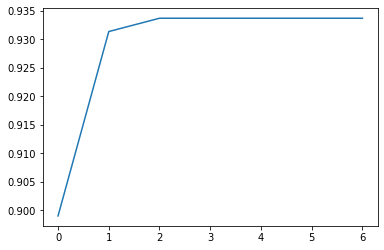

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# цикл подбора параметра через обычный grid-search

accuracy_val = []
max_iter_arr = []
for max_iter in [10, 25, 50, 100, 250, 500, 1000]:
  model = LogisticRegression(max_iter=max_iter).fit(x_train, y_train)
  max_iter_arr.append(max_iter)
  accuracy_val.append(accuracy_score(y_val, model.predict(x_val)))

plt.plot(accuracy_val)

Мы видим, что в целом, качество не меняется уже после 2 элемента, то есть после 50 итераций. Для надежности оставим 100 итераций. 

Теперь можно попробовать так же поиграться с регуляризацией

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


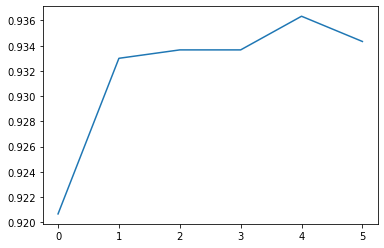

In [57]:
accuracy_val = []
max_iter_arr = []
for c in [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]:
  model = LogisticRegression(max_iter=100, C=c).fit(x_train, y_train)
  max_iter_arr.append(max_iter)
  accuracy_val.append(accuracy_score(y_val, model.predict(x_val)))

plt.plot(accuracy_val)


Так, мы видим, что с повышением уровня регуляризации качество модели не сильно меняется, но на валидации лучше всего себя показал всё-таки коэффициент 5.0, поэтому его и будем использовать далее

Итак, посмотрим, какое качество получилось у финальной модели

In [58]:
model = LogisticRegression(max_iter=100, C=5.0).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [59]:
print("Качество на обучении - {}".format(accuracy_score(y_train, model.predict(x_train))))
print("Качество на валидации - {}".format(accuracy_score(y_val, model.predict(x_val))))
print("Качество на тесте - {}".format(accuracy_score(y_test, model.predict(x_test))))

Качество на обучении - 0.9550333333333333
Качество на валидации - 0.9363333333333334
Качество на тесте - 0.9351666666666667


Кажется, что это уже достаточно хорошие результаты, особенно считая, что случайная модель выдает качество порядка 33%. То есть модель лучше в 66/7 раза примерно, что составляет около 9.5 раз. То есть на порядок лучше

Но мы можем попробовать еще и другие модели. Логистическая регрессия - это по сути 1-слойная нейросеть. Давайте посмотрим, получится ли сделать лучше, если настакать слоев. Для этого напишем следующие методы:

In [ ]:
# model.predict(vectorizer.transform(['Михаил Пантелеймонович, добрейшей души человек, который до недавнего времени был здоров, умер']))

In [60]:
import torch, torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [87]:
def get_batch(X, Y, batch_size=256):
    '''
    Возвращает случайный батч размера size
    '''
    assert (len(X) == len(Y))
    sample = np.random.choice(len(X), batch_size)
    x0 = torch.tensor(X[sample][:, :], dtype=torch.float32)
    y0 = torch.tensor(Y[sample], dtype=torch.long)
    
    return x0, y0

In [88]:
def get_accuracy(y_true, y_pred):
    '''
      Считает accuracy, поскольку у нас результаты torch, то обычный accuracy_score не сработает
    '''
    y_true = y_true.detach().numpy()
    y_pred = np.argmax(y_pred.detach().numpy(), axis=1)
    
    return (y_true == y_pred).mean()

In [89]:
class Model(nn.Module):
    def __init__(self, tf_idf_feats_amount):
        super(self.__class__, self).__init__()
        
        self.dense1 = nn.Linear(tf_idf_feats_amount, 1000)
        self.dense2 = nn.Linear(1000, 100)
        self.dense3 = nn.Linear(100, 10)
        
        self.batchnorm1 = nn.BatchNorm1d(1000)
        self.batchnorm2 = nn.BatchNorm1d(100)
        self.batchnorm3 = nn.BatchNorm1d(10)
        
        self.final_dense = nn.Linear(10, 3)
        
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = self.batchnorm1(x)
        x = F.relu(self.dense2(x))
        x = self.batchnorm2(x)
        x = F.relu(self.dense3(x))
        x = self.batchnorm3(x)
        x = F.relu(self.final_dense(x))
        return self.softmax(x)

In [90]:
model = Model(x_train.shape[1])
model

Model(
  (dense1): Linear(in_features=2282, out_features=1000, bias=True)
  (dense2): Linear(in_features=1000, out_features=100, bias=True)
  (dense3): Linear(in_features=100, out_features=10, bias=True)
  (batchnorm1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (final_dense): Linear(in_features=10, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [91]:
optimizer = optim.Adam(model.parameters(), lr=0.1)
loss_function = nn.NLLLoss()

train_loss_hist = []
train_acc_hist = []
val_loss_hist = []
val_acc_hist = []

In [93]:
from copy import deepcopy

In [95]:
best_model = deepcopy(model)
for epoch in range(10):
    train_loss = 0
    train_acc = 0
    batch_size = 32
    train_batches = int(np.ceil(len(x_train) / 32))
    #optimize model on all train batches
    for _ in range(train_batches):
        optimizer.zero_grad() 
        
        x_batch, y_batch = get_batch(x_train, y_train, 32)
        prediction_batch = model.forward(x_batch)

        loss = loss_function(prediction_batch, y_batch)
        loss.backward()
        optimizer.step()
        
        train_loss += float(loss)
        train_acc += get_accuracy(y_batch, prediction_batch) * x_batch.shape[0]
    
    # save loss and accuracy on train dataset
    train_loss_hist.append(train_loss)
    train_acc_hist.append(train_acc / len(x_train))
    
    # calculate loss and accuracy on test dataset
    x_val_batch, y_val_batch = get_batch(x_val, y_val, len(x_val))
    prediction_val = model.forward(x_val_batch)
    
    val_loss = float(loss_function(prediction_val, y_val_batch))
    val_acc = get_accuracy(y_val_batch, prediction_val)
    
    val_loss_hist.append(val_loss)
    val_acc_hist.append(val_acc)
    if val_acc == max(val_acc_hist):
      del best_model 
      best_model = deepcopy(model)

    print(f"Epoch {epoch + 1}")
    print(f"train loss = {train_loss_hist[-1]}")
    print(f"val loss = {val_loss_hist[-1]}")
    print(f"train acc = {train_acc_hist[-1]}")
    print(f"val acc = {val_acc_hist[-1]}")
    print("_____________")

Epoch 1
train loss = 178.21826980123296
val loss = 0.22473591566085815
train acc = 0.9351333333333334
val acc = 0.908
_____________
Epoch 2
train loss = 127.0323216887191
val loss = 0.2208021879196167
train acc = 0.9546666666666667
val acc = 0.9316666666666666
_____________
Epoch 3
train loss = 110.98725139256567
val loss = 0.20115800201892853
train acc = 0.9627333333333333
val acc = 0.93
_____________
Epoch 4
train loss = 99.27529700740706
val loss = 0.18672089278697968
train acc = 0.9659
val acc = 0.9383333333333334
_____________
Epoch 5
train loss = 80.45234769402305
val loss = 0.23191697895526886
train acc = 0.9725666666666667
val acc = 0.9346666666666666
_____________
Epoch 6
train loss = 83.94293978912174
val loss = 0.2616361975669861
train acc = 0.9716333333333333
val acc = 0.933
_____________
Epoch 7
train loss = 73.09014918809407
val loss = 0.30118438601493835
train acc = 0.9770333333333333
val acc = 0.932
_____________
Epoch 8
train loss = 70.79869310939102
val loss = 0.33603

Ну и замерим качество лучшей модели

In [97]:
x_train_batch, y_train_batch = get_batch(x_train, y_train, len(x_train))
x_val_batch, y_val_batch = get_batch(x_val, y_val, len(x_val))
x_test_batch, y_test_batch = get_batch(x_test, y_test, len(x_test))

prediction = best_model.forward(x_train_batch)
print("Обучение - {}".format(get_accuracy(y_train_batch, prediction)))
prediction = best_model.forward(x_val_batch)
print("Валидация - {}".format(get_accuracy(y_val_batch, prediction)))
prediction = best_model.forward(x_test_batch)
print("Тест - {}".format(get_accuracy(y_test_batch, prediction)))


Обучение - 0.9753
Валидация - 0.9383333333333334
Тест - 0.931


В целом мы видим, что качество на валидации не особенно выросло, всего лишь доля процента, при этом модель стала намного более тяжеловесной. В связи с этим я делаю вывод, что нет необходимости делать модель, которая считает через нейросеть - достаточно обычной логистической регрессии. **Её мы и оставим**

Итоговое качество на тестовой выборке - 93.5% точности предсказания. Это прям очень хороший результат, на мой скромный взгляд

In [98]:
best_model = LogisticRegression(max_iter=100, C=5.0).fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [100]:
print("Качество на обучении - {}".format(accuracy_score(y_train, best_model.predict(x_train))))
print("Качество на валидации - {}".format(accuracy_score(y_val, best_model.predict(x_val))))
print("Качество на тесте - {}".format(accuracy_score(y_test, best_model.predict(x_test))))

Качество на обучении - 0.9550333333333333
Качество на валидации - 0.9363333333333334
Качество на тесте - 0.9351666666666667


In [102]:
import pickle

pickle.dump(vectorizer, open("tfidf.pickle", "wb"))
pickle.dump(best_model, open("best_model.pickle", "wb"))